In [218]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [219]:
# class MyLinearRegression:
#     def __init__(self):
#         self.coef_ = None
#         self.intercept_ = None

#     def fit(self, X, y):
#         # Добавим столбец единиц (bias trick)
#         X_b = np.c_[np.ones((X.shape[0], 1)), X]
#         # Метод нормальных уравнений
#         theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
#         # theta_best = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y # mse стал 1.2934...
#         self.intercept_ = theta_best[0]
#         self.coef_ = theta_best[1:]

#     def predict(self, X):
#         return X @ self.coef_ + self.intercept_

In [220]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Масштабируем X
        X_scaled = self.scaler.fit_transform(X)
        X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
        # theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        theta_best = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y # псевдообратная матрица - mse стал 1.2934...
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        return X_scaled @ self.coef_ + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u/v

In [221]:
from sklearn.model_selection import train_test_split

BGM_df = pd.read_csv('final_df_BGM.csv')

X = BGM_df.drop(columns=["madness", "year"]) #.values
y = BGM_df['madness'] #.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [222]:
model = MyLinearRegression()

In [223]:
model.fit(X_train, y_train)

In [224]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [225]:
print("MSE на тестовой выборке:", mse)

MSE на тестовой выборке: 0.9649257166566881


In [226]:
r2 = model.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2): {r2}")

Коэффициент детерминации (R^2): -7.652474774771093


регрессия sklearn

In [227]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = model.score(X_test_scaled, y_test)
print(f"Коэффициент детерминации (R^2): {r2}")

Коэффициент детерминации (R^2): -7.652474774765821


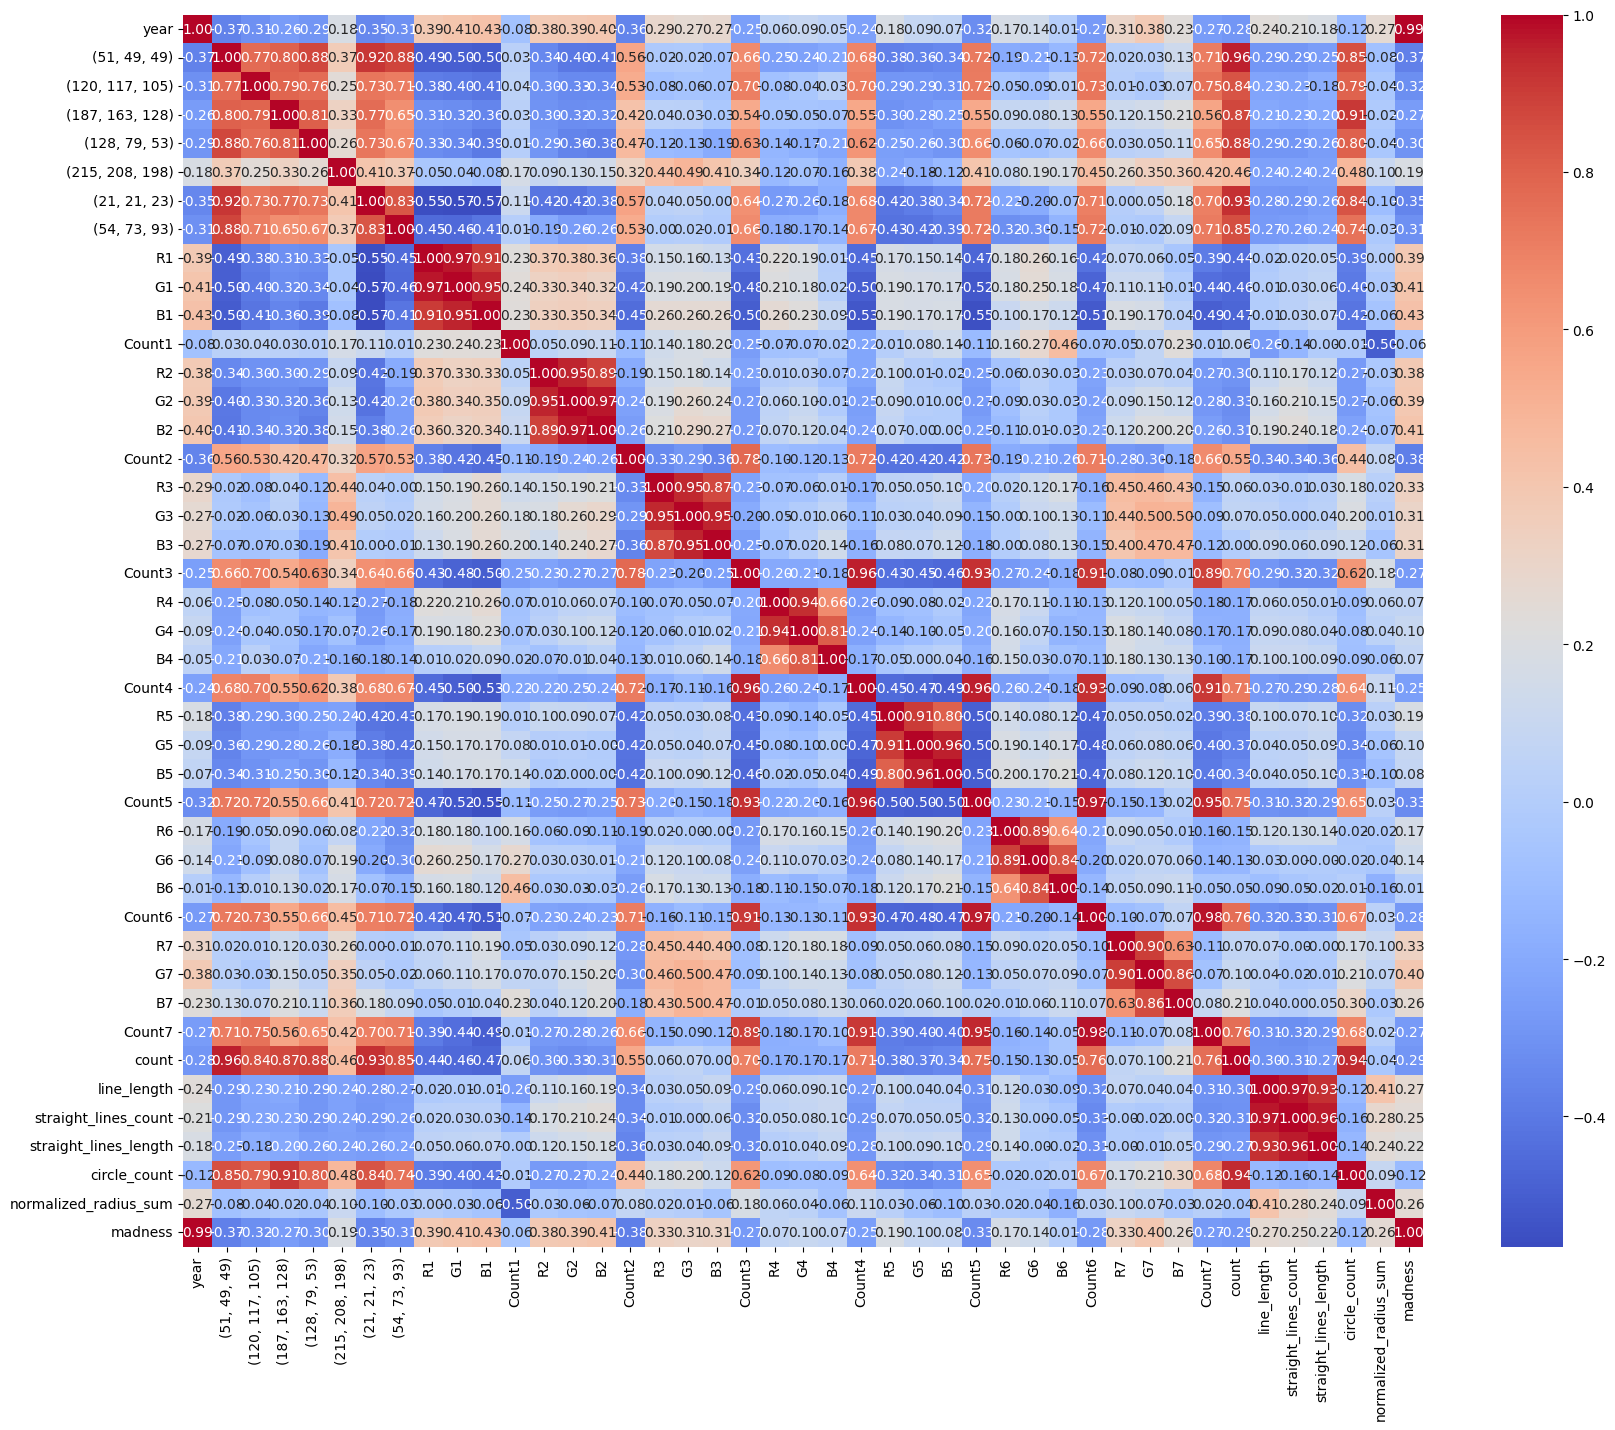

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = BGM_df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [229]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2) для Ridge: {ridge_r2}")

Коэффициент детерминации (R^2) для Ridge: -2.121004372768039


In [230]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_r2 = lasso.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2) для Lasso: {lasso_r2}")

Коэффициент детерминации (R^2) для Lasso: -0.12905353432683042


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e-01, tolerance: 2.874e-04
  model = cd_fast.enet_coordinate_descent(


In [231]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя ошибка на кросс-валидации: {-scores.mean()}")

Средняя ошибка на кросс-валидации: 1785.7681291123984
